### Training a Perceptron



In [2]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
# Class labels are stored as integer. 
# Avoiding tech glitches & improve computational performance, 
# advisable to store class labels as int labels

Class labels: [0 1 2]


In [3]:
from sklearn.model_selection import train_test_split

# already shuffles training set before splitting
# fixed random seed via random state, for internal pseudo random number generator
# that is used for shuffling the dataset prior to splitting
# Ensure are results reproducible
# > Stratify - to return same proportion of train & test subset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [7]:
print('Labels count in input:', np.bincount(y), np.bincount(y_train), np.bincount(y_test))

Labels count in input: [50 50 50] [35 35 35] [15 15 15]


In [8]:
from sklearn.preprocessing import StandardScaler
# intialize the object
sc = StandardScaler()
# Fit method estimated mean & varioance for each dimension from training data
sc.fit(X_train)
# standardized those dimension using estimated parameter
# standardize both train and test with same estimate to make comparable with one another
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)
# eta is learning rate, if too large, it overshoots the global loss minimum
# if too small, require more epoch  until convergence

Perceptron(eta0=0.01, random_state=1)

In [11]:
y_pred = ppn.predict(X_test_std)
print('Misclassified sample: %d' %(y_test != y_pred).sum())
# classification error versus accuracy - 
# 1 - misclassification error = accuracy

Misclassified sample: 2


In [13]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' %accuracy_score(y_test, y_pred))

# this method combines predict and score
print('Accuracy: %.3f' %ppn.score(X_test_std, y_test))

# Overfitting -> The model capture the pattern in training data well
# but fails to generalize well to unseen data


Accuracy: 0.956
Accuracy: 0.956


### Modeling class probabilities via Logistic Regression



In [14]:
np.arange(-7, 7, 0.1)

array([-7.00000000e+00, -6.90000000e+00, -6.80000000e+00, -6.70000000e+00,
       -6.60000000e+00, -6.50000000e+00, -6.40000000e+00, -6.30000000e+00,
       -6.20000000e+00, -6.10000000e+00, -6.00000000e+00, -5.90000000e+00,
       -5.80000000e+00, -5.70000000e+00, -5.60000000e+00, -5.50000000e+00,
       -5.40000000e+00, -5.30000000e+00, -5.20000000e+00, -5.10000000e+00,
       -5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -

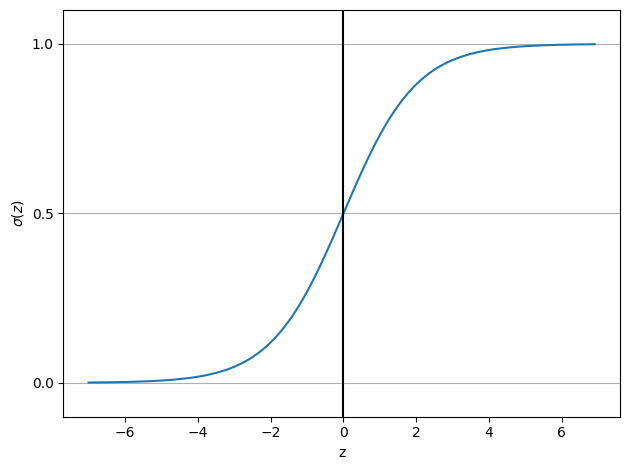

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\sigma (z)$')

# y axis ticks and gridlines
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# as z aproaches -> infintiy, then sigma(z) is 1, as the
# value of e^(-z) becomes small
# az z approaches -> negative infinity, the sigma(z) is 0, as the
# value of e^(-z) becomes large

In [ ]:
def loss_1(z):
    return -np.log(sigmoid(z))

def loss_0(z):
    return -np.log(1 - sigmoid(z))
